[*********************100%***********************]  1 of 1 completed


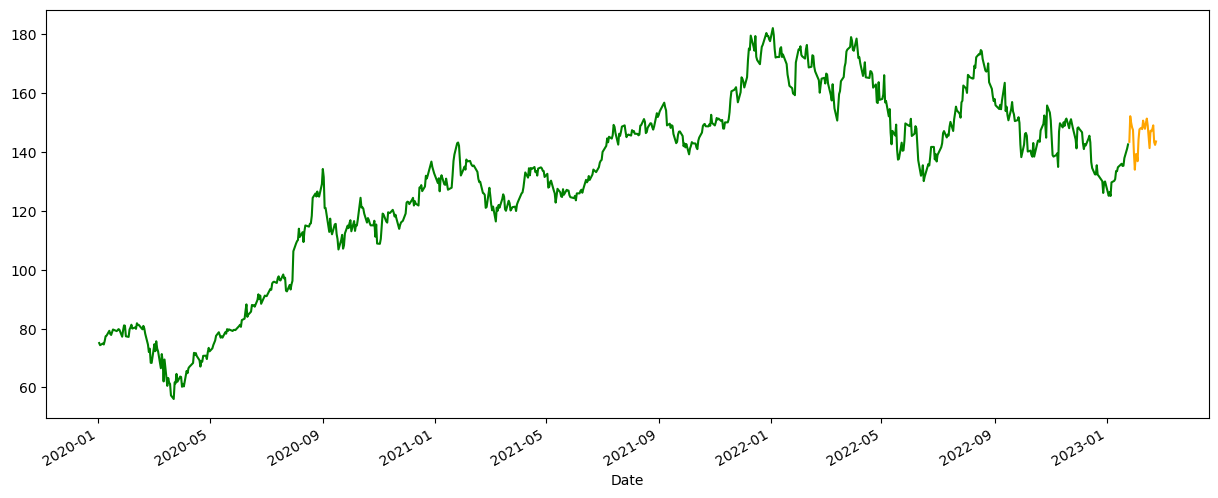

In [1]:
"""未来の株価の予測をグラフにする"""
import datetime

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader
import sklearn
import sklearn.linear_model
import sklearn.model_selection
import yfinance

yfinance.pdr_override()

df_aapl = pandas_datareader.data.get_data_yahoo('AAPL', '2020-01-01')

df_aapl ['label'] = df_aapl['Close'].shift(-30)
df_aapl['SMA'] = df_aapl['Close'].rolling(window=14).mean()
df_aapl.tail(35)

X = np.array(df_aapl.drop(['label', 'SMA'], axis='columns'))
y = np.array(df_aapl['label'])

y = y[:-30]
X = X[:-30]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2)

lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)

predicted_data = lr.predict(X[-30:])

df_aapl['Predict'] = np.nan

last_date = df_aapl.iloc[-1].name
one_day = 86400
next_day = last_date.timestamp() + one_day

for data in predicted_data:
    next_date = datetime.datetime.fromtimestamp(next_day)
    df_aapl.loc[next_date] = np.append([np.nan] * (len(df_aapl.columns)-1), data)
    next_day += one_day

df_aapl['Close'].plot(figsize=(15,6), color='green')
df_aapl['Predict'].plot(figsize=(15,6), color='orange')
plt.show()